### Introduction :

Black Friday is an informal name for the Friday following Thanksgiving Day in the United States, which is celebrated on the fourth Thursday of November. The day after Thanksgiving has been regarded as the beginning of America's Christmas shopping season since 1952, although the term "Black Friday" didn't become widely used until more recent decades.
Many stores offer highly promoted sales on Black Friday and open very early, such as at midnight, or may even start their sales at some time on Thanksgiving. Black Friday is not an official holiday, but California and some other states observe "The Day After Thanksgiving" as a holiday for state government employees, sometimes in lieu of another federal holiday, such as Columbus Day. Many non-retail employees and schools have both Thanksgiving and the following Friday off, which, along with the following regular weekend, makes it a four-day weekend, thereby increasing the number of potential shoppers.
Black Friday has routinely been the busiest shopping day of the year in the United States since 2005, although news reports, which at that time were inaccurate, have described it as the busiest shopping day of the year for a much longer period of time. Similar stories resurface year upon year at this time, portraying hysteria and shortage of stock, creating a state of positive feedback.

### About the Dataset :

The dataset here is a sample of the transactions made in a retail store. The store wants to know get an idea about customer purchase behaviour against different products.

### Problem Statement :

A retail company wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high-volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city category, years stayed in current city), product details (product id and product category) and purchase amount per transaction.
The store has a loyalty program and wants to provide offers on products during non-sale period on certain categories of interest. Based on the Black day sales data, recommend the top 100 products it must prioritize for loyalty rewards to customers? Please give a business and statistical reasoning. 
They want to build a model to predict the purchase amount of customer against various products which will help them create personalized offer for customers against different products.


In [1]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#df = pd.read_csv('/content/drive/My Drive/Datasets/BlackFriday.csv')
#df.head(10)
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.shape

(537577, 12)

The dataset contains 7 numerical (integer and float) and 5 categorical variables.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0]

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.310627
Product_Category_3            0.694410
Purchase                      0.000000
dtype: float64

In [9]:
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


#### There are null values in Product_category_2, Product_Category_3

In [10]:
df.describe().drop('User_ID',axis=1)

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


#### Imputing Product_Category_2 and Product_Category_3 with 0.

In [11]:
#Imputing Product_Category_2 and Product_Category_3 with 0.

df['Product_Category_2'].fillna(0,inplace=True)
df['Product_Category_3'].fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [13]:
print('No. of customers :', df['User_ID'].nunique())
print('No. of products :', df['Product_ID'].nunique())
print('Age Groups:', df['Age'].unique())
print('Occupation :', sorted(df['Occupation'].unique()))
print('No. of occupations :', df['Occupation'].nunique())
print('No. of years stayed in current city :', df['Stay_In_Current_City_Years'].unique())

No. of customers : 5891
No. of products : 3623
Age Groups: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
No. of occupations : 21
No. of years stayed in current city : ['2' '4+' '3' '1' '0']


There are special characters, like (+) in the columns 'Age' and 'Stay_In_Current_City_Years', which need to be removed.

In [14]:
df['Age']=(df['Age'].str.strip('+'))
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('float64'))

#### No Outliers

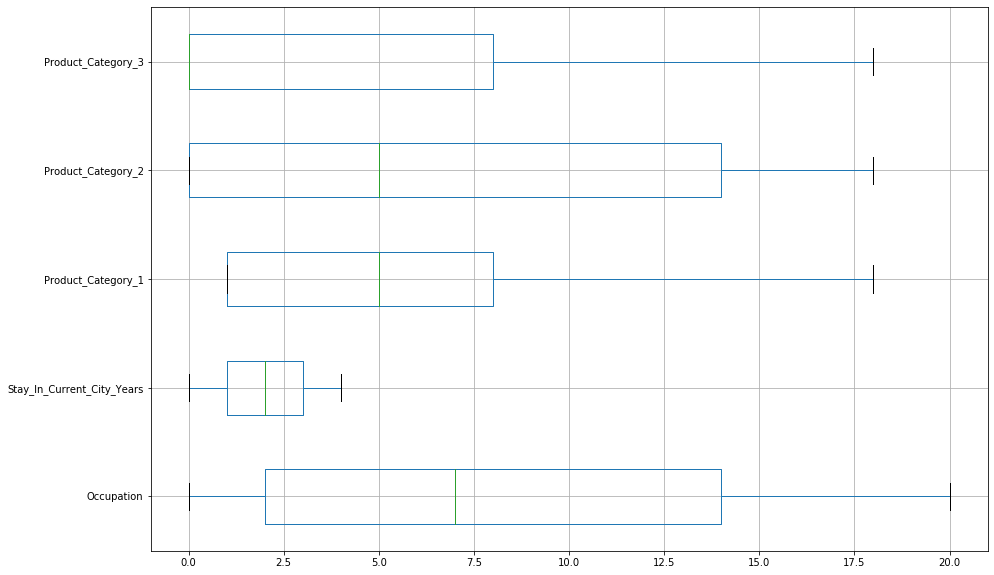

In [15]:
df.drop(['User_ID','Purchase','Marital_Status'],axis=1).boxplot(vert=False,figsize=(15,10))

In [16]:
#sns.pairplot(df.drop(['User_ID','Product_ID'],axis=1),diag_kind='kde')

#### Distribution of the target variable - Purchase

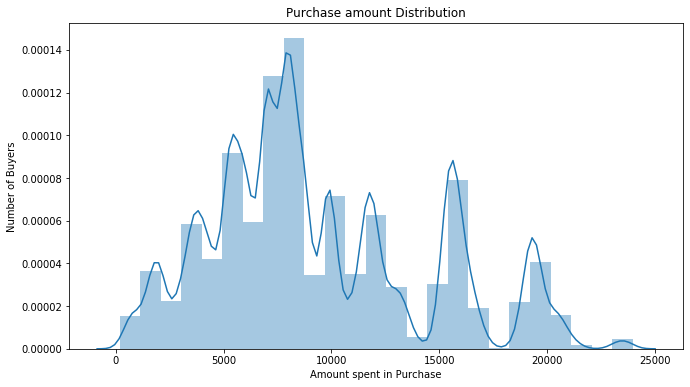

In [17]:
plt.figure(figsize=(11,6))

sns.distplot(df.Purchase, bins = 25)

plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

plt.show()

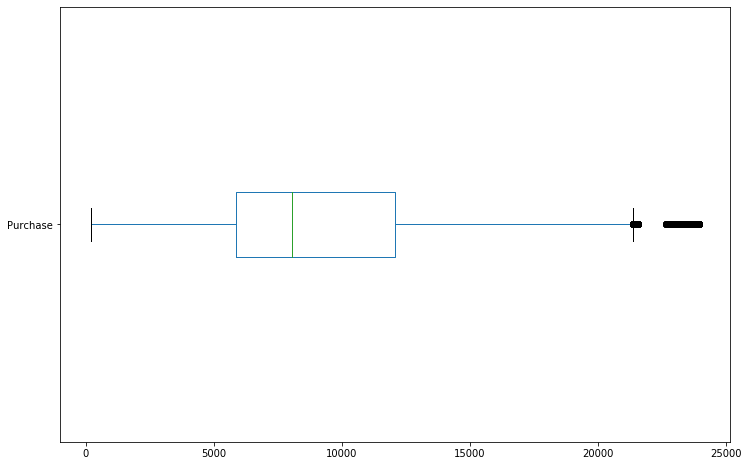

In [18]:
df['Purchase'].plot(kind='box',vert=False, figsize=(12,8))
plt.show()

In [19]:
import copy
df2 = copy.deepcopy(df)

#### Transforming Age Column

In [20]:
df2['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55        20903
0-17      14707
Name: Age, dtype: int64

In [21]:
df2[df2['Age']!='0-17']['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55        20903
Name: Age, dtype: int64

In [22]:
# Giving Age numerical values

age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55':6}
df2['Age'] = df2['Age'].apply(lambda x : age_dict[x])
df2['Age'].value_counts()

2    214690
3    107499
1     97634
4     44526
5     37618
6     20903
0     14707
Name: Age, dtype: int64

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null int64
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null float64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 49.2+ MB


In [24]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2.0,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0,10,A,2.0,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2.0,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0,10,A,2.0,0,12,14.0,0.0,1057
4,1000002,P00285442,M,6,16,C,4.0,0,8,0.0,0.0,7969


### Linear Regression

In [25]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2.0,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0,10,A,2.0,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2.0,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0,10,A,2.0,0,12,14.0,0.0,1057
4,1000002,P00285442,M,6,16,C,4.0,0,8,0.0,0.0,7969


In [26]:
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
      
df2['Gender'] = df2['Gender'].apply(map_gender)

In [27]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
      
df2['City_Category'] = df2['City_Category'].apply(map_city_categories)

In [28]:
import copy
df3 = copy.deepcopy(df2)
df3.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,2,2.0,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,2,2.0,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,2,2.0,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,2,2.0,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,0,4.0,0,8,0.0,0.0,7969


In [29]:
df3['Total_Purchase_Amount']=df3.groupby('User_ID').Purchase.transform('sum')

df3['Product_Category_1']=df3.groupby('User_ID').Product_Category_1.transform('count')


df3.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Total_Purchase_Amount
0,1000001,P00069042,0,0,10,2,2.0,0,34,0.0,0.0,8370,333481
1,1000001,P00248942,0,0,10,2,2.0,0,34,6.0,14.0,15200,333481
2,1000001,P00087842,0,0,10,2,2.0,0,34,0.0,0.0,1422,333481
3,1000001,P00085442,0,0,10,2,2.0,0,34,14.0,0.0,1057,333481
4,1000002,P00285442,1,6,16,0,4.0,0,76,0.0,0.0,7969,810353


In [30]:
aggregations = {
    'Product_Category_2': lambda x:x.astype(bool).sum(),
    'Product_Category_3': lambda x:x.astype(bool).sum()
}
df4 = df3.groupby('User_ID').agg(aggregations)
df4 = df4.reset_index()
df4.head()

,User_ID,Product_Category_2,Product_Category_3
0,1000001,21.0,14.0
1,1000002,54.0,26.0
2,1000003,23.0,13.0
3,1000004,12.0,9.0
4,1000005,58.0,16.0


In [31]:
df3.drop(['Product_ID','Product_Category_2', 'Product_Category_3', 'Purchase'],axis=1,inplace=True)
df3.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Total_Purchase_Amount
0,1000001,0,0,10,2,2.0,0,34,333481
1,1000001,0,0,10,2,2.0,0,34,333481
2,1000001,0,0,10,2,2.0,0,34,333481
3,1000001,0,0,10,2,2.0,0,34,333481
4,1000002,1,6,16,0,4.0,0,76,810353


In [32]:
df3.drop_duplicates(keep='first', inplace=True)
df3.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Total_Purchase_Amount
0,1000001,0,0,10,2,2.0,0,34,333481
4,1000002,1,6,16,0,4.0,0,76,810353
5,1000003,1,2,15,2,3.0,0,29,341635
6,1000004,1,4,7,1,2.0,1,13,205987
9,1000005,1,2,20,2,1.0,1,106,821001


In [33]:
df4.head()

,User_ID,Product_Category_2,Product_Category_3
0,1000001,21.0,14.0
1,1000002,54.0,26.0
2,1000003,23.0,13.0
3,1000004,12.0,9.0
4,1000005,58.0,16.0


In [34]:
df5 = pd.merge(df3, df4, how='inner', on='User_ID')
df5.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Total_Purchase_Amount,Product_Category_2,Product_Category_3
0,1000001,0,0,10,2,2.0,0,34,333481,21.0,14.0
1,1000002,1,6,16,0,4.0,0,76,810353,54.0,26.0
2,1000003,1,2,15,2,3.0,0,29,341635,23.0,13.0
3,1000004,1,4,7,1,2.0,1,13,205987,12.0,9.0
4,1000005,1,2,20,2,1.0,1,106,821001,58.0,16.0


In [35]:
df5.shape

(5891, 11)

#### Dependent Variable - Total Purchase Amount

Outcome variable is left skewed.

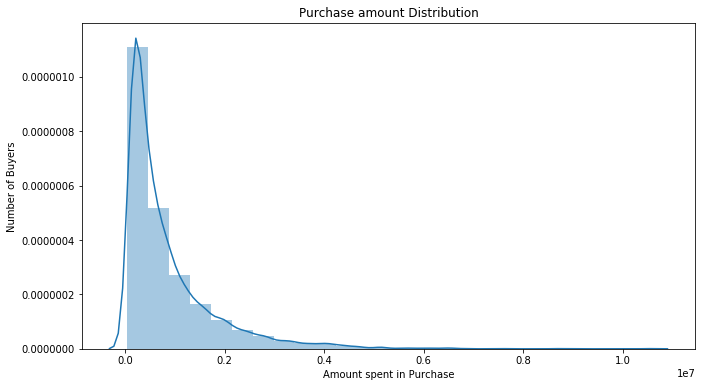

In [36]:
plt.figure(figsize=(11,6))

sns.distplot(df5.Total_Purchase_Amount, bins = 25)

plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

plt.show()

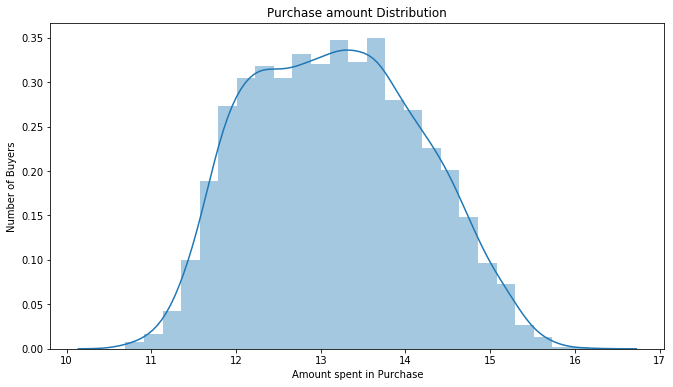

In [37]:
# Applying Log Transformation

plt.figure(figsize=(11,6))

sns.distplot(np.log(df5.Total_Purchase_Amount), bins = 25)

plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

plt.show()

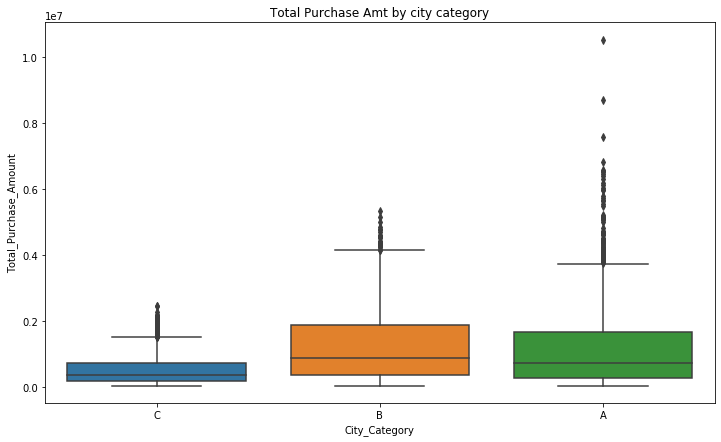

In [38]:
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.boxplot(x = "City_Category", y = "Total_Purchase_Amount", data = df5)
plt.title('Total Purchase Amt by city category')
labels = ['C','B','A']
ax.set_xticklabels(labels)
plt.show()

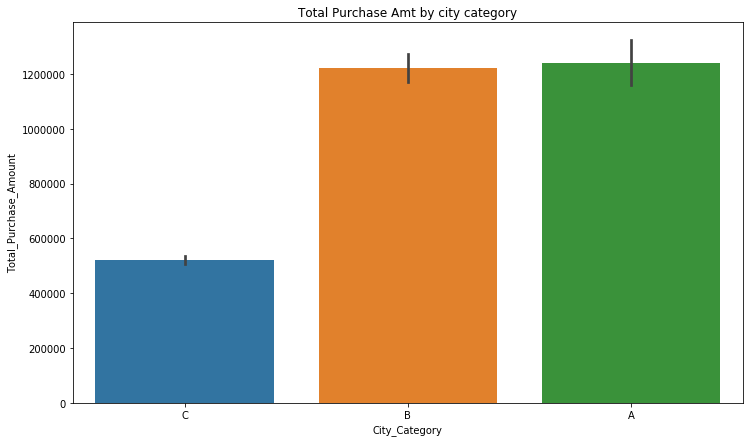

In [39]:
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.barplot(x = "City_Category", y = "Total_Purchase_Amount", data = df5)
plt.title('Total Purchase Amt by city category')
labels = ['C','B','A']
ax.set_xticklabels(labels)
plt.show()

### Statistical Tests

In [40]:
import scipy.stats as stats
# Group total purchase data by city
dfa = df5.loc[:,['City_Category','Total_Purchase_Amount']]
groups = dfa.groupby("City_Category").groups
# Etract individual groups
City_A = dfa['Total_Purchase_Amount'][groups[2]].values
City_B = dfa['Total_Purchase_Amount'][groups[1]].values
City_C = dfa['Total_Purchase_Amount'][groups[0]].values
# Perform the ANOVA
stats.f_oneway(City_A, City_B, City_C)


F_onewayResult(statistic=489.43337469555007, pvalue=2.3325431344630196e-197)

In [41]:
print('Count, Mean and standard deviation of Total Purchase Amount of City_A: %3d, %3.2f and %3.2f' % (len(City_A), City_A.mean(),np.std(City_A,ddof =1)))
print('Count, Mean and standard deviation of Total Purchase Amount of City_B: %3d, %3.2f and %3.2f' % (len(City_B), City_B.mean(),np.std(City_B,ddof =1)))
print('Count, Mean and standard deviation of Total Purchase Amount of City_C: %3d, %3.2f and %3.2f' % (len(City_C), City_C.mean(),np.std(City_C,ddof =1)))

Count, Mean and standard deviation of Total Purchase Amount of City_A: 1045, 1239874.45 and 1362553.19
Count, Mean and standard deviation of Total Purchase Amount of City_B: 1707, 1220522.33 and 1054554.53
Count, Mean and standard deviation of Total Purchase Amount of City_C: 3139, 522003.18 and 422754.25


In [42]:
# Group total purchase data by city
dfa = df5.loc[:,['Gender','Total_Purchase_Amount']]
groups = dfa.groupby("Gender").groups
# Etract individual groups
F = dfa['Total_Purchase_Amount'][groups[0]].values
M = dfa['Total_Purchase_Amount'][groups[1]].values

# Perform the ANOVA
stats.f_oneway(F,M)


F_onewayResult(statistic=62.87507380651762, pvalue=2.6155339946341774e-15)

In [43]:
print('Count, Mean and standard deviation of Total Purchase Amount of Females: %3d, %3.2f and %3.2f' % (len(F), F.mean(),np.std(F,ddof =1)))
print('Count, Mean and standard deviation of Total Purchase Amount of Males: %3d, %3.2f and %3.2f' % (len(M), M.mean(),np.std(M,ddof =1)))


Count, Mean and standard deviation of Total Purchase Amount of Females: 1666, 699054.03 and 795738.05
Count, Mean and standard deviation of Total Purchase Amount of Males: 4225, 911963.16 and 975397.76


In [44]:
# Group total purchase data by city
dfa = df.loc[:,['City_Category','Purchase']]
groups = df.groupby("City_Category").groups
# Etract individual groups
City_A = dfa['Purchase'][groups['A']].values
City_B = dfa['Purchase'][groups['B']].values
City_C = dfa['Purchase'][groups['C']].values
# Perform the ANOVA
stats.f_oneway(City_A, City_B, City_C)

F_onewayResult(statistic=1376.6587765751206, pvalue=0.0)

In [45]:
print('Count, Mean and standard deviation of Total Purchase Amount of City_A: %3d, %3.2f and %3.2f' % (len(City_A), City_A.mean(),np.std(City_A,ddof =1)))
print('Count, Mean and standard deviation of Total Purchase Amount of City_B: %3d, %3.2f and %3.2f' % (len(City_B), City_B.mean(),np.std(City_B,ddof =1)))
print('Count, Mean and standard deviation of Total Purchase Amount of City_C: %3d, %3.2f and %3.2f' % (len(City_C), City_C.mean(),np.std(City_C,ddof =1)))

Count, Mean and standard deviation of Total Purchase Amount of City_A: 144638, 8958.01 and 4866.90
Count, Mean and standard deviation of Total Purchase Amount of City_B: 226493, 9198.66 and 4927.06
Count, Mean and standard deviation of Total Purchase Amount of City_C: 166446, 9844.44 and 5109.47


In [46]:
#'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55':6

# Group total purchase data by city
dfa = df5.loc[:,['Age','Total_Purchase_Amount']]
groups = dfa.groupby("Age").groups
# Etract individual groups
#F = dfa['Total_Purchase_Amount'][groups[0]].values
#M = dfa['Total_Purchase_Amount'][groups[1]].values

kids = dfa['Total_Purchase_Amount'][groups[0]].values
ya = dfa['Total_Purchase_Amount'][groups[1]].values
a = dfa['Total_Purchase_Amount'][groups[2]].values
ma = dfa['Total_Purchase_Amount'][groups[3]].values
o = dfa['Total_Purchase_Amount'][groups[4]].values
o2 = dfa['Total_Purchase_Amount'][groups[5]].values
sc = dfa['Total_Purchase_Amount'][groups[6]].values

# Perform the ANOVA
stats.f_oneway(kids,ya,a,ma,o,o2,sc)


F_onewayResult(statistic=17.468284183553315, pvalue=3.806902405716732e-20)

In [47]:
print('Count, Mean and standard deviation of Total Purchase Amount of 0-17: %3d, %3.2f and %3.2f' % (len(kids), kids.mean(),np.std(kids,ddof =1)))
print('Count, Mean and standard deviation of Total Purchase Amount of 18-25: %3d, %3.2f and %3.2f' % (len(ya), ya.mean(),np.std(ya,ddof =1)))
print('Count, Mean and standard deviation of Total Purchase Amount of 26-35: %3d, %3.2f and %3.2f' % (len(a), a.mean(),np.std(a,ddof =1)))
print('Count, Mean and standard deviation of Total Purchase Amount of 36-45: %3d, %3.2f and %3.2f' % (len(ma), ma.mean(),np.std(ma,ddof =1)))
print('Count, Mean and standard deviation of Total Purchase Amount of 46-50: %3d, %3.2f and %3.2f' % (len(o), o.mean(),np.std(o,ddof =1)))
print('Count, Mean and standard deviation of Total Purchase Amount of 51-55: %3d, %3.2f and %3.2f' % (len(o2), o2.mean(),np.std(o2,ddof =1)))
print('Count, Mean and standard deviation of Total Purchase Amount of 55+: %3d, %3.2f and %3.2f' % (len(sc), sc.mean(),np.std(sc,ddof =1)))

Count, Mean and standard deviation of Total Purchase Amount of 0-17: 218, 608527.55 and 675160.70
Count, Mean and standard deviation of Total Purchase Amount of 18-25: 1069, 843469.86 and 878749.50
Count, Mean and standard deviation of Total Purchase Amount of 26-35: 2053, 974061.91 and 1019680.54
Count, Mean and standard deviation of Total Purchase Amount of 36-45: 1167, 866023.62 and 971746.58
Count, Mean and standard deviation of Total Purchase Amount of 46-50: 531, 778565.39 and 917390.70
Count, Mean and standard deviation of Total Purchase Amount of 51-55: 481, 752408.22 and 783468.85
Count, Mean and standard deviation of Total Purchase Amount of 55+: 372, 531222.69 and 611004.99


In [48]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Total_Purchase_Amount ~ City_Category', data = df5).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                     sum_sq      df           F         PR(>F)
City_Category  6.034081e+14     1.0  785.514617  2.315083e-162
Residual       4.523748e+15  5889.0         NaN            NaN


In [49]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Purchase ~ City_Category', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

                     df        sum_sq       mean_sq            F  PR(>F)
City_Category       2.0  6.796357e+10  3.398179e+10  1376.658777     0.0
Residual       537574.0  1.326961e+13  2.468425e+07          NaN     NaN


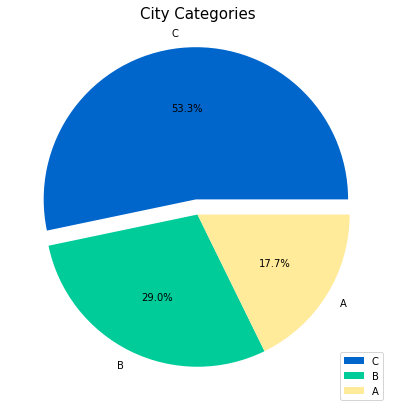

In [50]:

explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))


colors = ['#0066cc','#00cc99','#ffeb99']
dict1 = {'fontsize': 15} 

ax1.pie(df5['City_Category'].value_counts(), explode=explode, labels=['C','B','A'], autopct='%1.1f%%',colors=colors)
plt.legend()
plt.title('City Categories',fontdict=dict1)
plt.show()

[Text(0, 0, 'C'), Text(0, 0, 'B'), Text(0, 0, 'A')]

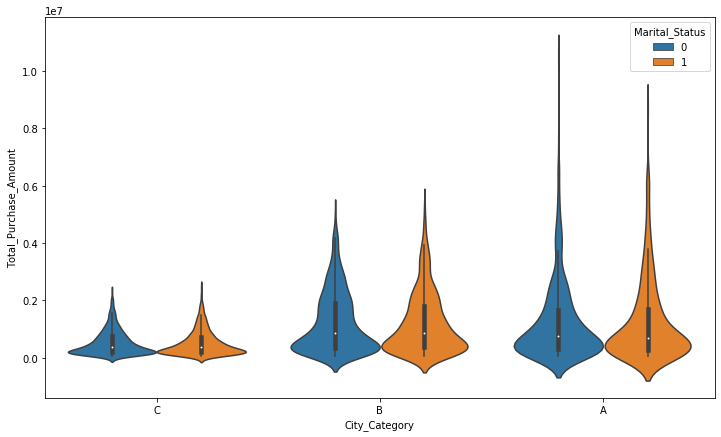

In [51]:
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.violinplot(x='City_Category',y='Total_Purchase_Amount',hue='Marital_Status',
               data=df5)

labels = ['C','B','A']
ax.set_xticklabels(labels)

<Figure size 864x504 with 0 Axes>

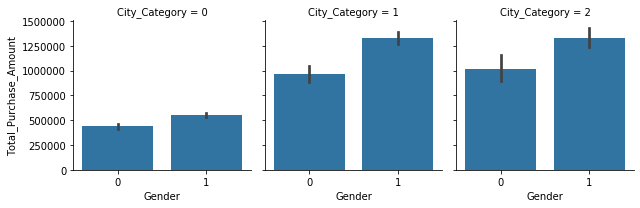

In [52]:
plt.figure(figsize=(12,7))
g = sns.FacetGrid(df5,col="City_Category")
g.map(sns.barplot, "Gender", "Total_Purchase_Amount");

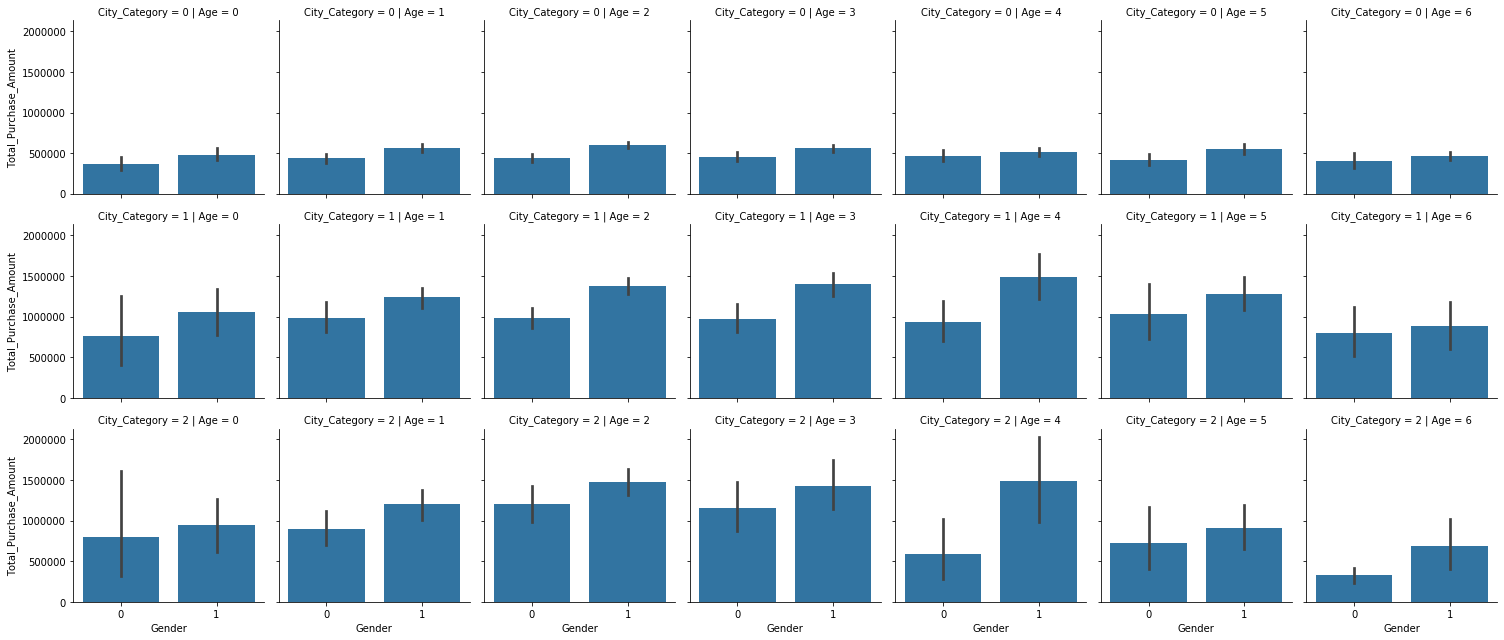

In [53]:
g = sns.FacetGrid(df5,col="Age",row="City_Category")
g.map(sns.barplot, "Gender", "Total_Purchase_Amount");

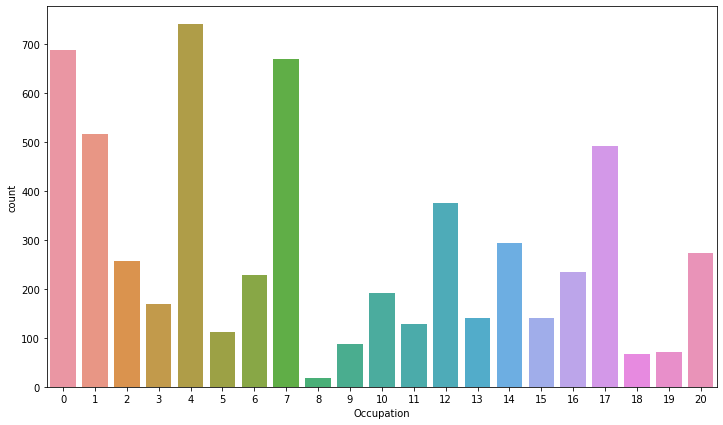

In [54]:
plt.figure(figsize=(12,7))
sns.countplot(df5['Occupation'])
plt.show()

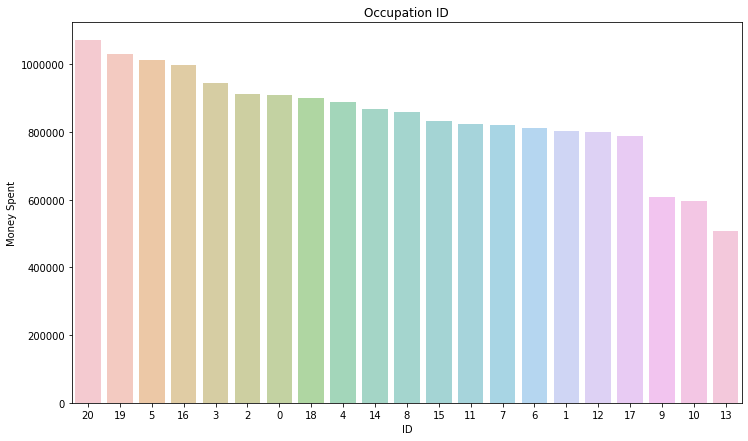

In [55]:
plt.figure(figsize=(12,7))
occupation_id = list(range(0, 21))
money_spent = []
for oid in occupation_id:
    money_spent.append(df5[df5['Occupation'] == oid]['Total_Purchase_Amount'].mean())

y_pos = np.arange(21)

oi_df = pd.DataFrame({'ID':y_pos,'Money_Spent':money_spent})
oi_df = oi_df.sort_values(['Money_Spent'],ascending=False)
sns.barplot(oi_df['ID'],oi_df['Money_Spent'], alpha=0.5, order=oi_df['ID'])
plt.ylabel('Money Spent')
plt.title('Occupation ID')

plt.show()


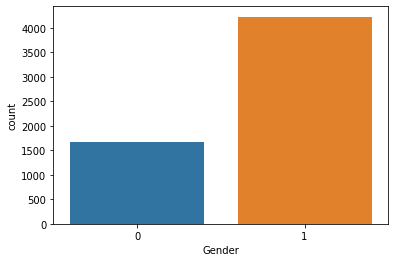

In [56]:
sns.countplot(df5['Gender'])

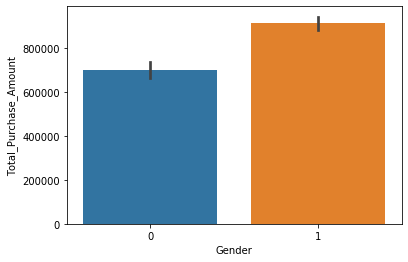

In [57]:
sns.barplot('Gender', 'Total_Purchase_Amount', data = df5)
plt.show()

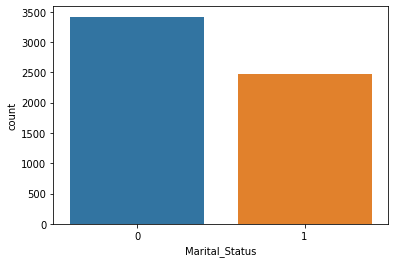

In [58]:
sns.countplot(df5['Marital_Status'])

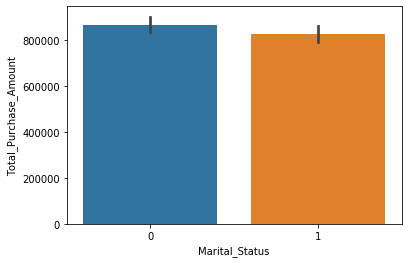

In [59]:
sns.barplot('Marital_Status', 'Total_Purchase_Amount', data = df5)
plt.show()

#### Marital status vs gender - Count

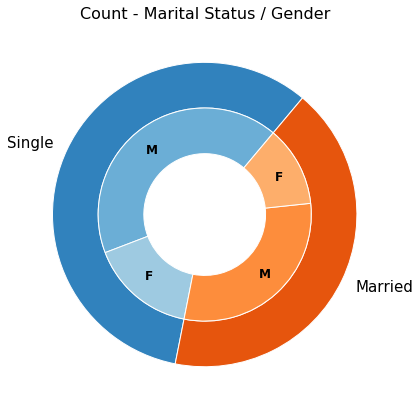

In [60]:
out_vals = df5.Marital_Status.value_counts()
in_vals = np.array([df5[df5.Marital_Status==x]['Gender'].value_counts() for x in [0,1]]).flatten()

fig, ax = plt.subplots(figsize=(7, 7))

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap(np.array([1, 2, 5, 6]))

ax.pie(out_vals, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['Single', 'Married'],
       textprops={'fontsize': 15}, startangle=50)

ax.pie(in_vals, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['M', 'F', 'M', 'F'],
       labeldistance=0.75, textprops={'fontsize': 12, 'weight': 'bold'}, startangle=50)

ax.set(aspect="equal")
plt.title('Count - Marital Status / Gender', fontsize=16)
plt.show()

#### Marital vs Gender vs Purchase

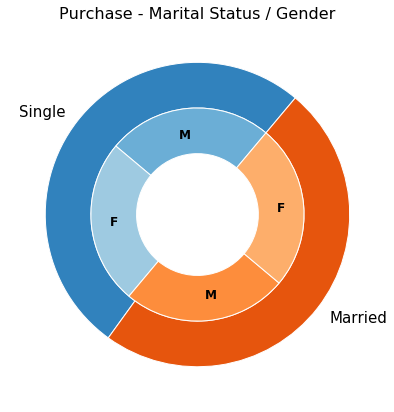

In [61]:
out_vals = [df5[df5.Marital_Status==x]['Total_Purchase_Amount'].mean() for x in [0,1]]

m_p = [df5[df5.Marital_Status==x & (df5.Gender=='M')]['Total_Purchase_Amount'].mean() for x in [0,1]]
f_p = [df5[df5.Marital_Status==x & (df5.Gender=='F')]['Total_Purchase_Amount'].mean() for x in [0,1]]


in_vals = np.array([m_p,f_p]).flatten()

fig, ax = plt.subplots(figsize=(7, 7))

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap(np.array([1, 2, 5, 6]))

ax.pie(out_vals, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['Single', 'Married'],
       textprops={'fontsize': 15}, startangle=50)

ax.pie(in_vals, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['M', 'F', 'M', 'F'],
       labeldistance=0.75, textprops={'fontsize': 12, 'weight': 'bold'}, startangle=50)

ax.set(aspect="equal")
plt.title('Purchase - Marital Status / Gender', fontsize=16)
plt.show()

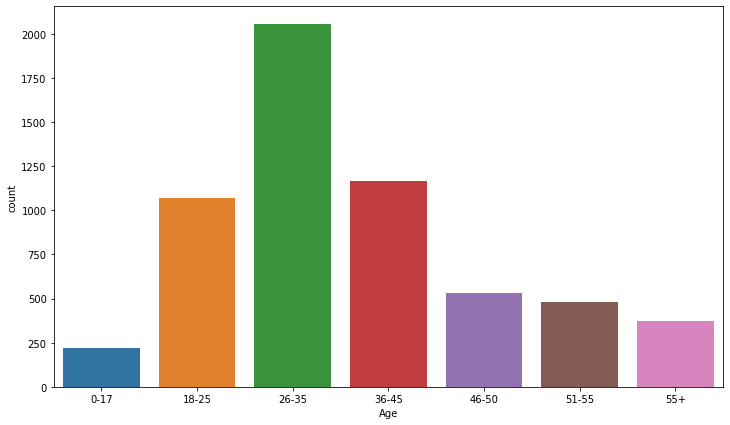

In [62]:
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.countplot(df5['Age'])
labels=['0-17','18-25','26-35','36-45','46-50','51-55','55+']

ax.set_xticklabels(labels)
plt.show()


In [63]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:

X = df5.drop(['User_ID','Total_Purchase_Amount'],axis=1)
Y = df5['Total_Purchase_Amount']

In [66]:
df5.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Total_Purchase_Amount', 'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [67]:
#X = df5[['Gender', 'Age','Product_Category_1', 'Product_Category_2', 'Product_Category_3']]
#Y = df5['Total_Purchase_Amount']

In [68]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#X=sc.fit_transform(X)

In [69]:
# Split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size = 0.3, random_state=100)

In [70]:
# Building a baseline model with all the features

# Instantiate
lm = LinearRegression()

# fit
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
# print coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[4.95033507e+04 5.04361304e+03 2.13446552e+02 1.52356863e+03
 8.17729455e+02 3.27264383e+01 6.02872468e+03 1.18083080e+03
 6.61484170e+03]
-10510.621019367594


In [72]:
# predict 
y_pred = lm.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r_squared = r2_score(Y_test, y_pred)
print('Mean Absolute Error =' ,mae)
print('Mean Squared Error =' ,mse)
print('R Square Value =',r_squared)
print("RMSE Value =",np.sqrt(mse))

Mean Absolute Error = 96438.03903685848
Mean Squared Error = 28091823197.884235
R Square Value = 0.9688350076756642
RMSE Value = 167606.15501193336


#### A better metric to look at is adjusted r-squared, which penalises a model for having more features, and thus weighs both the goodness of fit and model complexity. 
#### Using statsmodels library for this.

In [74]:
import statsmodels.api as sm  

In [75]:
#xtrain = sm.add_constant(X_train) 
xtrain=X_train

In [76]:
lm_ols = sm.OLS(Y_train, xtrain).fit()   
print(lm_ols.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Total_Purchase_Amount   R-squared (uncentered):                   0.982
Model:                               OLS   Adj. R-squared (uncentered):              0.982
Method:                    Least Squares   F-statistic:                          2.491e+04
Date:                   Tue, 03 Dec 2019   Prob (F-statistic):                        0.00
Time:                           19:52:52   Log-Likelihood:                         -55475.
No. Observations:                   4123   AIC:                                  1.110e+05
Df Residuals:                       4114   BIC:                                  1.110e+05
Df Model:                              9                                                  
Covariance Type:               nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.

In [77]:
print('Parameters: ', lm_ols.params)
print('R2: ', lm_ols.rsquared)

Parameters:  Gender                        46612.606463
Age                            3948.874181
Occupation                       72.781385
City_Category                   403.818633
Stay_In_Current_City_Years     -250.610536
Marital_Status                 -568.094871
Product_Category_1             6036.768867
Product_Category_2             1162.189708
Product_Category_3             6611.959696
dtype: float64
R2:  0.9819775673970916


In [78]:
#import statsmodels.formula.api as smf
#lm_ols = smf.ols(formula='Total_Purchase_Amount ~ Product', data=df5).fit()
#lm_ols.conf_int()

#### Decision Tree Model

In [79]:
dt_model = DecisionTreeRegressor(max_depth=5,random_state=100)
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=100, splitter='best')

In [80]:
y_pred = dt_model.predict(X_test)

In [81]:
print("Mean Squared error with Decision tree Regresssion is: ", mean_squared_error(Y_test, y_pred))
print("R2 score with Simple Decision tree Regresssion is: ", r2_score(Y_test, y_pred))
print("Root Mean Squared error(RMSE) with Decision tree Regresssion is: ", np.sqrt(mean_squared_error(Y_test, y_pred)))

Mean Squared error with Decision tree Regresssion is:  36855412698.59551
R2 score with Simple Decision tree Regresssion is:  0.9591127052960925
Root Mean Squared error(RMSE) with Decision tree Regresssion is:  191977.635933448


In [82]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = ['Gender', 'Age', 'Occupation', 'City_Category',
                                                                              'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
                                                                              'Product_Category_2', 'Product_Category_3']))

                                 Imp
Gender                      0.000000
Age                         0.000000
Occupation                  0.000000
City_Category               0.000000
Stay_In_Current_City_Years  0.000000
Marital_Status              0.000000
Product_Category_1          0.849460
Product_Category_2          0.149319
Product_Category_3          0.001221


In [83]:
rf=RandomForestRegressor()
y_pred=rf.fit(X_train, Y_train).predict(X_test)

In [84]:
print("Mean Squared error with RandomForest Regresssion is: ", mean_squared_error(Y_test, y_pred))
print("R2 score with Simple RandomForest Regresssion is: ", r2_score(Y_test, y_pred))
print("Root Mean Squared error(RMSE) with RandomForest Regresssion is: ", np.sqrt(mean_squared_error(Y_test, y_pred)))

Mean Squared error with RandomForest Regresssion is:  39825210004.36088
R2 score with Simple RandomForest Regresssion is:  0.9558180202346408
Root Mean Squared error(RMSE) with RandomForest Regresssion is:  199562.54659720315


In [85]:
gb=GradientBoostingRegressor()
y_pred=gb.fit(X_train, Y_train).predict(X_test)

In [86]:
print("Mean Squared error with GradientBoosting Regresssion is: ", mean_squared_error(Y_test, y_pred))
print("R2 score with Simple GradientBoosting Regresssion is: ", r2_score(Y_test, y_pred))
print("Root Mean Squared error(RMSE) with GradientBoosting Regresssion is: ", np.sqrt(mean_squared_error(Y_test, y_pred)))

Mean Squared error with GradientBoosting Regresssion is:  34605540948.35233
R2 score with Simple GradientBoosting Regresssion is:  0.9616087069024372
Root Mean Squared error(RMSE) with GradientBoosting Regresssion is:  186025.64594257518


## Revisiting Feature Engineering
### Extracting new features :
#### Product Category 1 seems to be the Category Type and 2 & 3 seems to be the sub category types of the product bought by the user.
#### We calculate the total number of products bought by the user from each category

In [87]:
import copy
df32 = copy.deepcopy(df2)
df32.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,2,2.0,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,2,2.0,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,2,2.0,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,2,2.0,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,0,4.0,0,8,0.0,0.0,7969


In [88]:
df32['Total_Purchase_Amount']=df32.groupby('User_ID').Purchase.transform('sum')

df32['User_Purchase_Count']=df32.groupby('User_ID').Product_Category_1.transform('count')


df32.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Total_Purchase_Amount,User_Purchase_Count
0,1000001,P00069042,0,0,10,2,2.0,0,3,0.0,0.0,8370,333481,34
1,1000001,P00248942,0,0,10,2,2.0,0,1,6.0,14.0,15200,333481,34
2,1000001,P00087842,0,0,10,2,2.0,0,12,0.0,0.0,1422,333481,34
3,1000001,P00085442,0,0,10,2,2.0,0,12,14.0,0.0,1057,333481,34
4,1000002,P00285442,1,6,16,0,4.0,0,8,0.0,0.0,7969,810353,76


In [89]:
df32.drop(['Product_ID','Product_Category_2', 'Product_Category_3', 'Purchase'],axis=1,inplace=True)
df32.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Total_Purchase_Amount,User_Purchase_Count
0,1000001,0,0,10,2,2.0,0,3,333481,34
1,1000001,0,0,10,2,2.0,0,1,333481,34
2,1000001,0,0,10,2,2.0,0,12,333481,34
3,1000001,0,0,10,2,2.0,0,12,333481,34
4,1000002,1,6,16,0,4.0,0,8,810353,76


In [90]:
dummies = pd.DataFrame(pd.get_dummies(df32['Product_Category_1']).values,columns = ['Cat_'+str(i) for i in range(1,19)])
dummies.head()

,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Cat_8,Cat_9,Cat_10,Cat_11,Cat_12,Cat_13,Cat_14,Cat_15,Cat_16,Cat_17,Cat_18
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [91]:
dummies = pd.concat([df32['User_ID'], dummies], axis=1)
dummies.head()

,User_ID,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Cat_8,Cat_9,Cat_10,Cat_11,Cat_12,Cat_13,Cat_14,Cat_15,Cat_16,Cat_17,Cat_18
0,1000001,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1000001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1000001,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1000001,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1000002,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [92]:
dummies = dummies.groupby('User_ID').apply(lambda x : x.astype(int).sum()).drop('User_ID',axis=1).reset_index()
dummies.head()

,User_ID,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Cat_8,Cat_9,Cat_10,Cat_11,Cat_12,Cat_13,Cat_14,Cat_15,Cat_16,Cat_17,Cat_18
0,1000001,4,1,11,2,2,1,0,8,0,0,0,3,0,1,0,1,0,0
1,1000002,31,1,0,0,13,6,0,25,0,0,0,0,0,0,0,0,0,0
2,1000003,15,2,1,0,9,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1000004,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1000005,18,2,1,3,20,6,5,44,0,0,2,0,0,1,1,3,0,0


In [93]:
df32.drop('Product_Category_1',axis=1,inplace=True)
df32.drop_duplicates(keep='first', inplace=True)
df32.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Total_Purchase_Amount,User_Purchase_Count
0,1000001,0,0,10,2,2.0,0,333481,34
4,1000002,1,6,16,0,4.0,0,810353,76
5,1000003,1,2,15,2,3.0,0,341635,29
6,1000004,1,4,7,1,2.0,1,205987,13
9,1000005,1,2,20,2,1.0,1,821001,106


In [94]:
df52 = pd.merge(df32, dummies, how='inner', on='User_ID')
df52.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Total_Purchase_Amount,User_Purchase_Count,Cat_1,...,Cat_9,Cat_10,Cat_11,Cat_12,Cat_13,Cat_14,Cat_15,Cat_16,Cat_17,Cat_18
0,1000001,0,0,10,2,2.0,0,333481,34,4,...,0,0,0,3,0,1,0,1,0,0
1,1000002,1,6,16,0,4.0,0,810353,76,31,...,0,0,0,0,0,0,0,0,0,0
2,1000003,1,2,15,2,3.0,0,341635,29,15,...,0,0,0,0,0,0,0,0,0,1
3,1000004,1,4,7,1,2.0,1,205987,13,13,...,0,0,0,0,0,0,0,0,0,0
4,1000005,1,2,20,2,1.0,1,821001,106,18,...,0,0,2,0,0,1,1,3,0,0


In [95]:
df52.shape

(5891, 27)

## Model Building

In [96]:

X = df52.drop(['User_ID','Total_Purchase_Amount'],axis=1)
Y = df52['Total_Purchase_Amount']

#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#X=sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size = 0.3, random_state=100)


In [97]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
y_pred = lm.predict(X_test)

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r_squared = r2_score(Y_test, y_pred)
print('Mean Absolute Error =' ,mae)
print('Mean Squared Error =' ,mse)
print('R Square Value =',r_squared)
print("RMSE Value =",np.sqrt(mse))

Mean Absolute Error = 80532.63438108678
Mean Squared Error = 20935741926.15665
R Square Value = 0.9767739447939396
RMSE Value = 144691.88617941452


After FE, there is an improvement in the RMSE Value. RMSE has reduced from 167606 to 144691.

<Figure size 432x288 with 0 Axes>

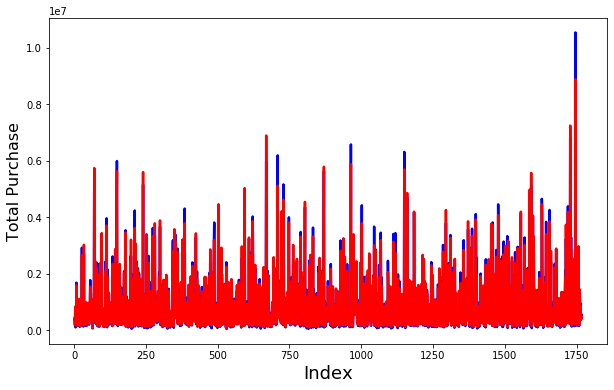

In [99]:
# Actual vs Predicted

c = [i for i in range(1,1769,1)]         # Generating index 

fig = plt.figure()
plt.figure(figsize = (10,6))

plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Total Purchase', fontsize=16)                       # Y-label
plt.show()

<Figure size 432x288 with 0 Axes>

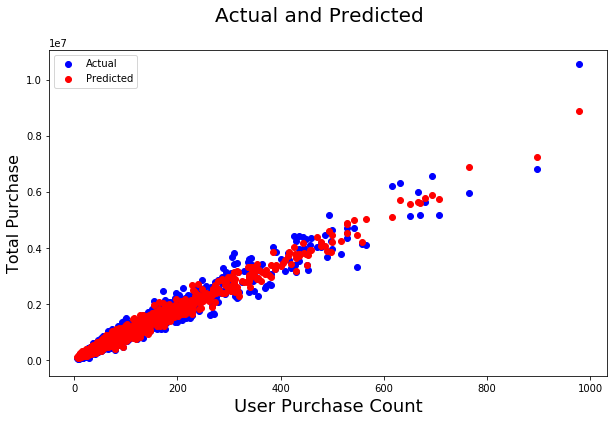

In [100]:
fig = plt.figure()
plt.figure(figsize = (10,6))
plt.scatter(X_test.User_Purchase_Count,Y_test, color="blue", label='Actual')
plt.scatter(X_test.User_Purchase_Count,y_pred, color="red", label='Predicted')
plt.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.legend()
plt.xlabel('User Purchase Count', fontsize=18)                               # X-label
plt.ylabel('Total Purchase', fontsize=16) 

plt.show()

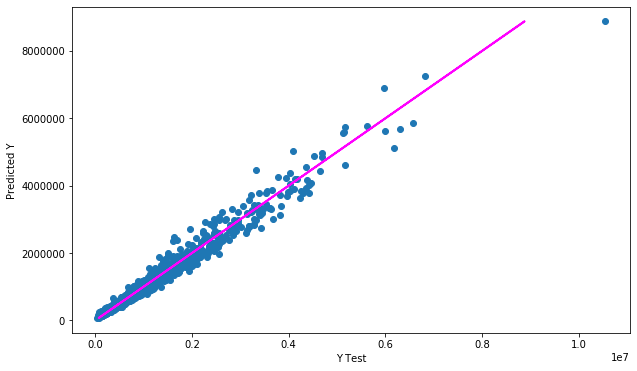

In [101]:
#Scatter plot of Actual VS Predicted values

plt.figure(figsize = (10,6))
plt.scatter(Y_test, y_pred)
plt.plot(y_pred,y_pred, color='magenta', linewidth=2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [102]:
lm_ols = sm.OLS(Y_train, X_train).fit()   
print(lm_ols.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Total_Purchase_Amount   R-squared (uncentered):                   0.986
Model:                               OLS   Adj. R-squared (uncentered):              0.986
Method:                    Least Squares   F-statistic:                          1.245e+04
Date:                   Tue, 03 Dec 2019   Prob (F-statistic):                        0.00
Time:                           19:53:06   Log-Likelihood:                         -54884.
No. Observations:                   4123   AIC:                                  1.098e+05
Df Residuals:                       4099   BIC:                                  1.100e+05
Df Model:                             24                                                  
Covariance Type:               nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.

In [103]:
lin_model = LinearRegression()

lin_model.fit(X_train, Y_train)


# model evaluation for training set

y_train_predict = lin_model.predict(X_train)

rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
print("The model performance for training set")

print("--------------------------------------")

print('RMSE is {}'.format(rmse))

print('R square is %1.3f' %lin_model.score(X_train, Y_train))

#print('R2 score is {}'.format(r2))

print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")

print("--------------------------------------")

print('RMSE is {}'.format(rmse))

print('R square is %1.3f' %lin_model.score(X_test, Y_test))

The model performance for training set
--------------------------------------
RMSE is 145925.54404142607
R square is 0.975


The model performance for testing set
--------------------------------------
RMSE is 144691.88617941452
R square is 0.977


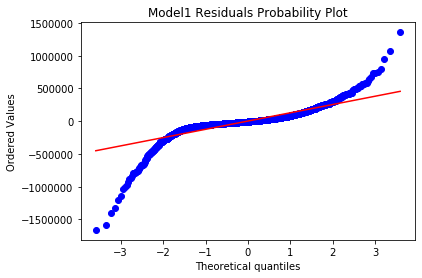

In [104]:
#Called, Q-Q plot
stats.probplot(lm_ols.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot")
plt.show()

In [105]:
import statsmodels.stats.api     as     sms
from   statsmodels.compat        import lzip

residuals = lm_ols.resid
name = ['F statistic', 'p-value']

test = sms.het_goldfeldquandt(residuals, lm_ols.model.exog)

print(lzip(name, test))

[('F statistic', 0.7347943760969017), ('p-value', 0.9999999999980457)]


In [ ]:
# Plot the residuals after fitting a linear model
#ax = sns.residplot(Y_, residuals, lowess = True, color = "g")
#ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
#plt.show()

#### Decision Tree Model

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=5,random_state=100)
dt_model.fit(X_train, Y_train)

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
print("Mean Squared error with Decision tree Regresssion is: ", mean_squared_error(Y_test, y_pred))
print("R2 score with Simple Decision tree Regresssion is: ", r2_score(Y_test, y_pred))
print("Root Mean Squared error(RMSE) with Decision tree Regresssion is: ", np.sqrt(mean_squared_error(Y_test, y_pred)))

In [ ]:
#print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"],index=X_train.columns))

In [ ]:
rf=RandomForestRegressor()

y_pred=rf.fit(X_train, Y_train).predict(X_test)

In [ ]:
print("Mean Squared error with RandomForest Regresssion is: ", mean_squared_error(Y_test, y_pred))
print("R2 score with Simple RandomForest Regresssion is: ", r2_score(Y_test, y_pred))
print("Root Mean Squared error(RMSE) with RandomForest Regresssion is: ", np.sqrt(mean_squared_error(Y_test, y_pred)))

In [ ]:
print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"],index=X_train.columns).sort_values('Imp',ascending=False))

In [ ]:
fi = pd.DataFrame(rf.feature_importances_, columns = ["Imp"],index=X_train.columns).sort_values('Imp',ascending=False)

In [ ]:
fi

In [ ]:
gb=GradientBoostingRegressor(max_depth=2)
gb.fit(X_train, Y_train)

In [ ]:
y_pred=gb.fit(X_train, Y_train).predict(X_test)

In [ ]:
print("Mean Squared error with GradientBoosting Regresssion is: ", mean_squared_error(Y_test, y_pred))
print("R2 score with GradientBoosting Regresssion is: ", r2_score(Y_test, y_pred))
print("Root Mean Squared error(RMSE) with GradientBoosting Regresssion is: ", np.sqrt(mean_squared_error(Y_test, y_pred)))